<a href="https://colab.research.google.com/github/gurramkarthik2244/SQL-PROJECTS/blob/main/Machine_leaning_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1 **

In [ ]:
# task 1: Netflix Movies & TV Shows Analysis:
# load & first look
import pandas as pd
df = pd.read_csv("/content/archive.zip")
df.shape
df.head()
df.info()
# data cleaning
# 1. fix column types
df['date_added'] = pd.to_datetime(df['date_added'],errors= 'coerce')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# 2. handle duplicates
df.duplicated(subset=['show_id']).sum()
df.drop_duplicates(subset=['show_id'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# 3. handle missing values
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
print(df.director)
print(df.country)

0       Kirsten Johnson
1               Unknown
2       Julien Leclercq
3               Unknown
4               Unknown
             ...       
8802      David Fincher
8803            Unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object
0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object


In [ ]:
# 4. standarize text
df['title'] = df['title'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
print(df.title)
print(df.listed_in)

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8807, dtype: object
0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & 

In [ ]:
# 5 parse duration
import re
def parse_duration(x):
    if pd.isna(x): return None
    if 'min' in x:
        return int(re.search(r'(\d+)', x).group(1))
    if 'Season' in x:
        return int(re.search(r'(\d+)', x).group(1))
df['duration_num'] = df['duration'].apply(parse_duration)
df['duration_type'] = df['duration'].apply(lambda x: 'Minutes' if 'min' in str(x) else 'Seasons')
# 6. split multi valued fields
df_genres = df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')
print(df_genres)

     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
2         s3  TV Show             Ganglands  Julien Leclercq   
...      ...      ...                   ...              ...   
8805   s8806    Movie                  Zoom     Peter Hewitt   
8805   s8806    Movie                  Zoom     Peter Hewitt   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
1     Ama

In [ ]:
/content/archive.zip

**exploratory data analysis**

In [ ]:
# dataset overview
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


**visualization**

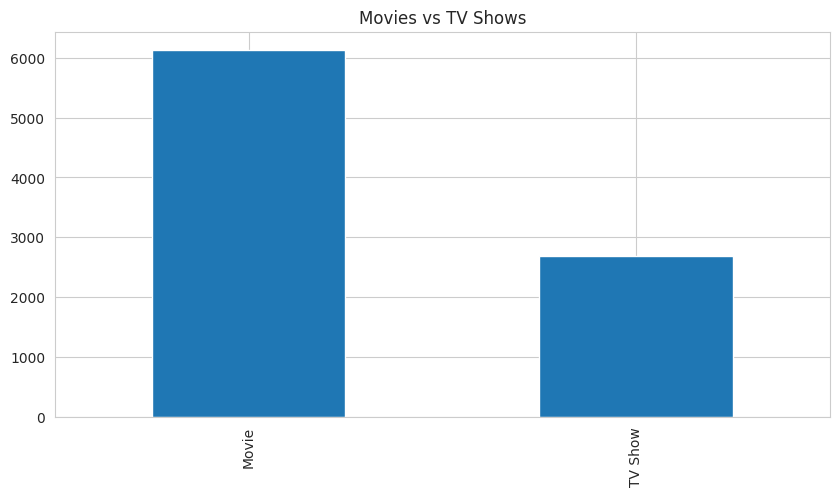

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
df['type'].value_counts().plot(kind='bar')
plt.title('Movies vs TV Shows')
plt.xlabel('')
plt.show()

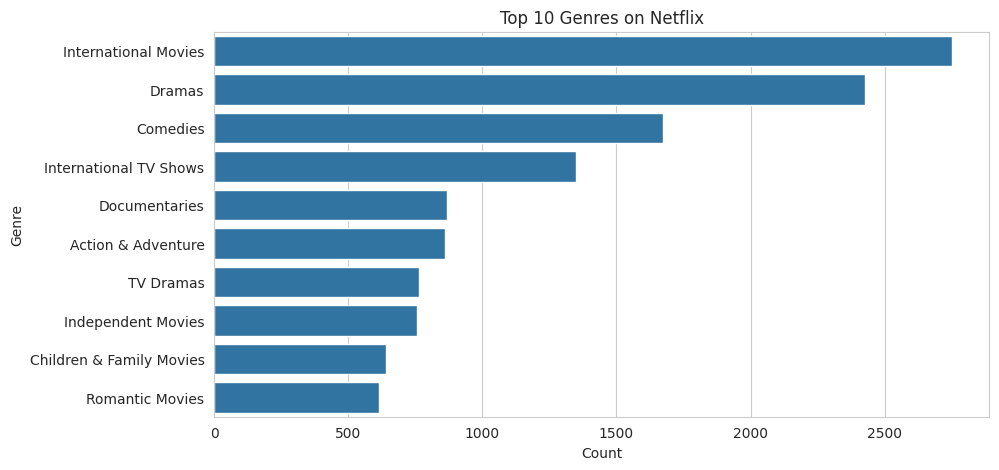

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

genre_data = df_genres['genre']
top_genres = genre_data.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

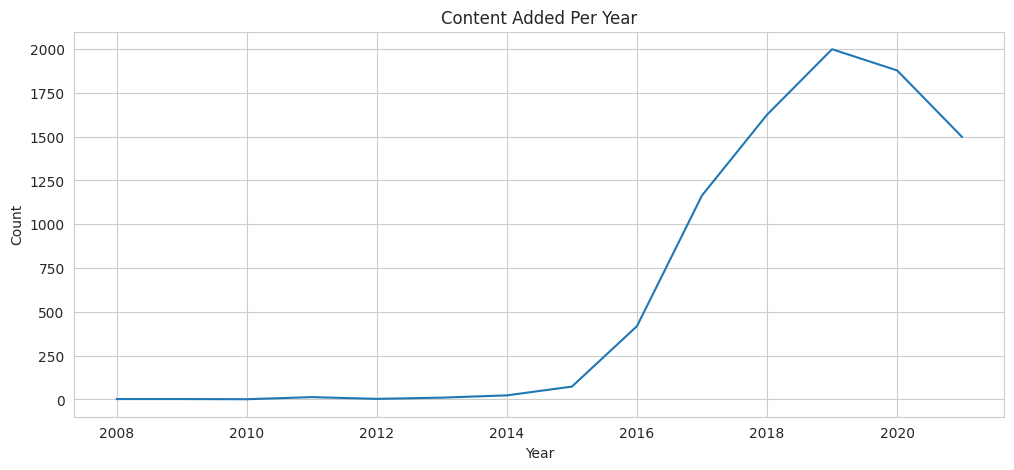

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

# Reload the Netflix dataset to ensure 'date_added' is available
netflix_df = pd.read_csv("/content/archive.zip")
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year

yearly = netflix_df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

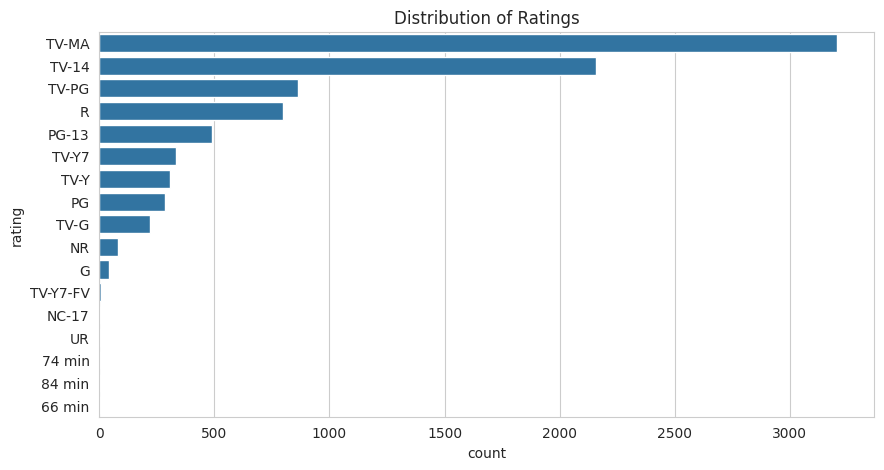

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_df, y="rating", order=netflix_df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()

**TASK - 2**

In [ ]:
# task 2 : Heart Disease Prediction
import pandas as pd
df = pd.read_csv("/content/archive (1).zip")
df.shape
df.head()
df.info()
df.describe()
df['Heart Disease'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,count
Heart Disease,
Absence,150
Presence,120


In [ ]:
# visualization for heart disease
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/archive (1).zip")

# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Display information about the DataFrame
print("Information about the DataFrame:")
print(df.info())

# Display descriptive statistics of the DataFrame
print("Descriptive statistics of the DataFrame:")
print(df.describe())

# Count the occurrences of each value in the 'Heart Disease' column
print("Value counts for 'Heart Disease':")
print(df['Heart Disease'].value_counts())


Shape of the DataFrame: (270, 14)
First few rows of the DataFrame:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1              

**exploratory data analysis**

<Axes: >

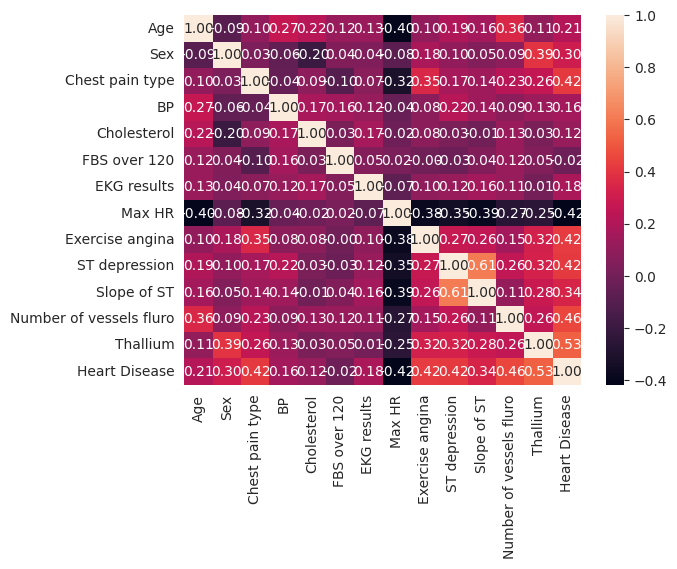

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**data cleaning & preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)


[[-1.3361797  -1.47528661 -0.10435568 ...  0.69812296 -0.70900762
  -0.85615942]
 [-0.03903446  0.67783439  0.9202274  ...  0.69812296  1.43288953
  -0.85615942]
 [-0.36332077 -1.47528661 -0.10435568 ... -0.95896011 -0.70900762
  -0.85615942]
 ...
 [-1.44427514  0.67783439 -1.12893877 ...  0.69812296 -0.70900762
   0.69787785]
 [-0.25522534  0.67783439 -1.12893877 ... -0.95896011  0.36194095
  -0.85615942]
 [ 0.93382446 -1.47528661  0.9202274  ...  0.69812296  1.43288953
  -0.85615942]]
[[ 0.06906097 -1.47528661 -1.12893877  0.22616347  0.03326693 -0.39380225
   0.95252037  0.4688221  -0.68511879  0.31918397  0.69812296 -0.70900762
  -0.85615942]
 [-1.3361797   0.67783439  0.9202274   0.51420186 -0.4328297  -0.39380225
  -1.05474207  1.23190488 -0.68511879 -0.93924147 -0.95896011 -0.70900762
  -0.85615942]
 [ 0.06906097  0.67783439 -1.12893877 -0.06187491  0.26631524 -0.39380225
  -1.05474207  0.19949877 -0.68511879 -0.93924147 -0.95896011 -0.70900762
  -0.85615942]
 [ 0.60953815  0.67

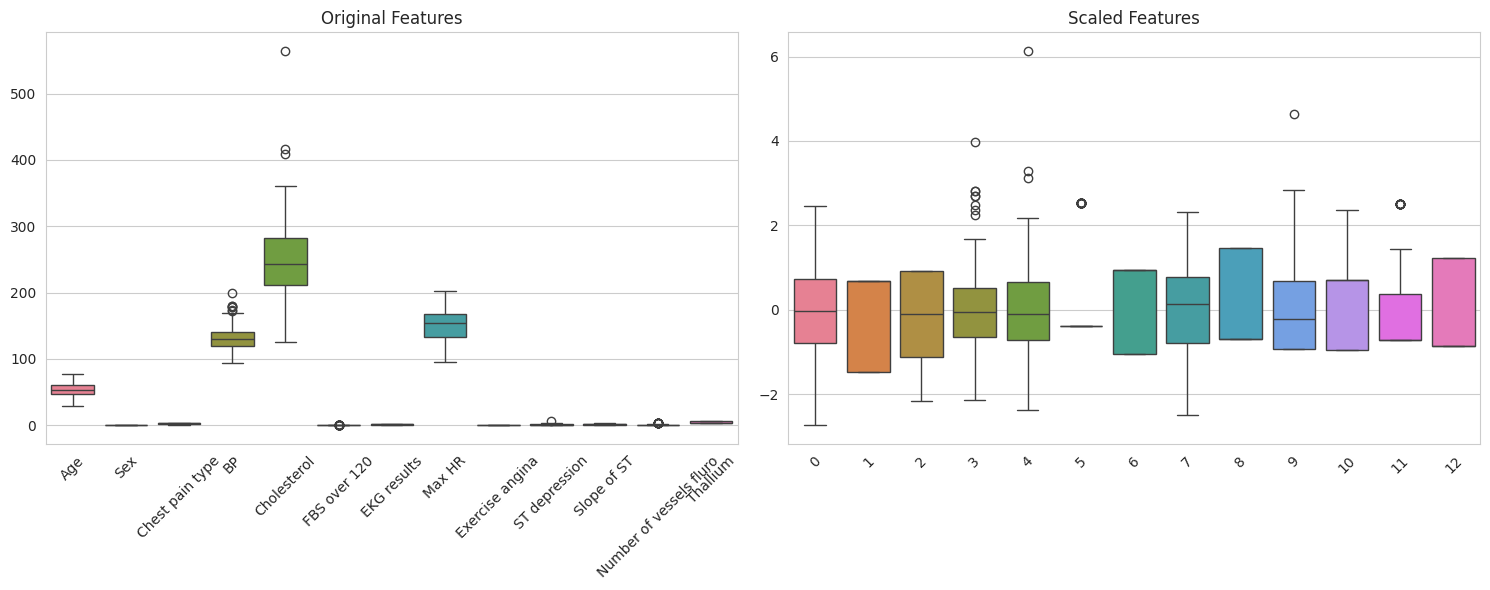

In [ ]:
# visualization for data cleaning & processing
import matplotlib.pyplot as plt
import seaborn as sns

# Create side-by-side boxplots to compare original and scaled features
plt.figure(figsize=(15, 6))

# Original features
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Original Features')
plt.xticks(rotation=45)

# Scaled features
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Scaled Features')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

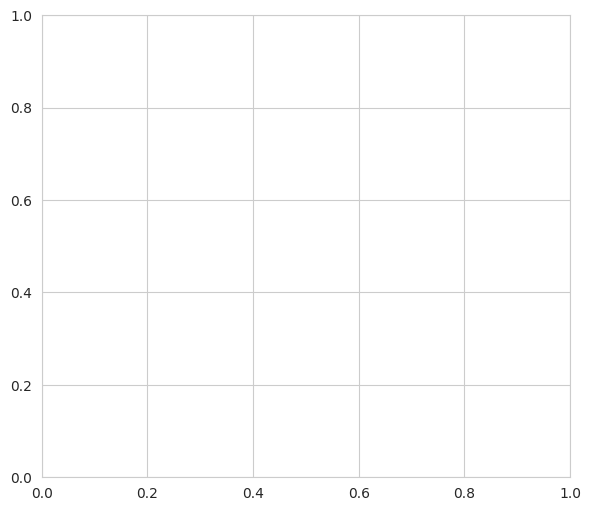

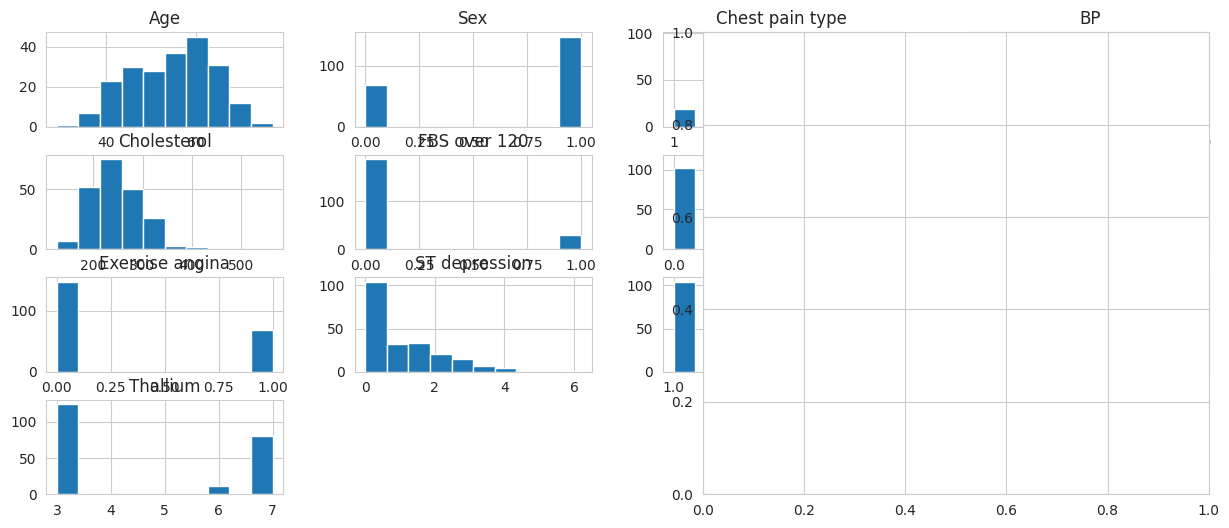

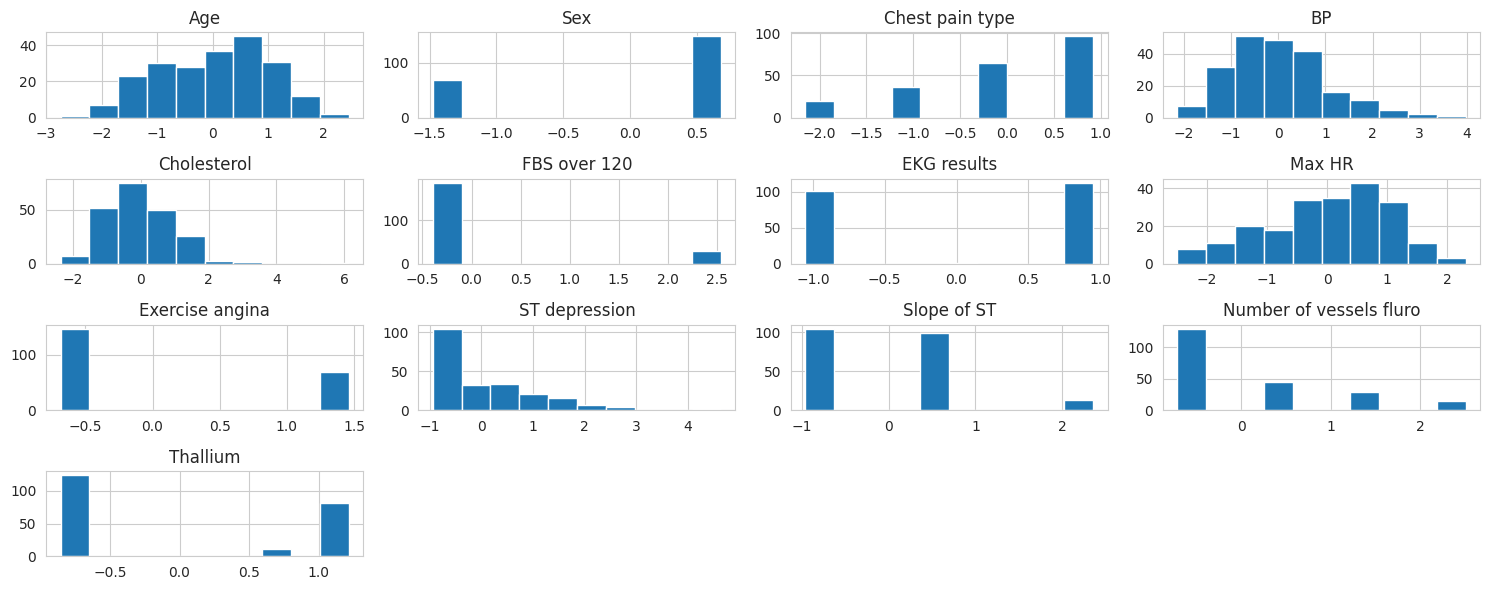

In [ ]:
# histogram
plt.figure(figsize=(15, 6))

# Original features histograms
plt.subplot(1, 2, 1)
X_train.hist(figsize=(15, 6))
plt.title('Original Features Distribution')

# Scaled features histograms
plt.subplot(1, 2, 2)
pd.DataFrame(X_train_scaled, columns=X_train.columns).hist(figsize=(15, 6))
plt.title('Scaled Features Distribution')

plt.tight_layout()
plt.show()

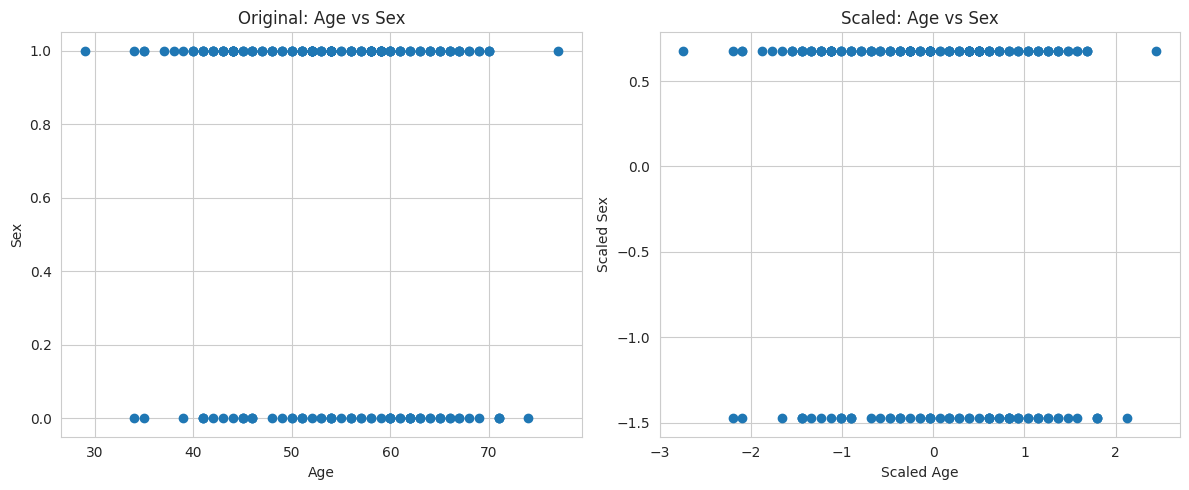

In [ ]:
# scatter plot
# Choose two features to compare
feature1, feature2 = X_train.columns[:2]

plt.figure(figsize=(12, 5))

# Original features scatter
plt.subplot(1, 2, 1)
plt.scatter(X_train[feature1], X_train[feature2])
plt.title(f'Original: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)

# Scaled features scatter
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, X_train.columns.get_loc(feature1)],
            X_train_scaled[:, X_train.columns.get_loc(feature2)])
plt.title(f'Scaled: {feature1} vs {feature2}')
plt.xlabel(f'Scaled {feature1}')
plt.ylabel(f'Scaled {feature2}')

plt.tight_layout()
plt.show()

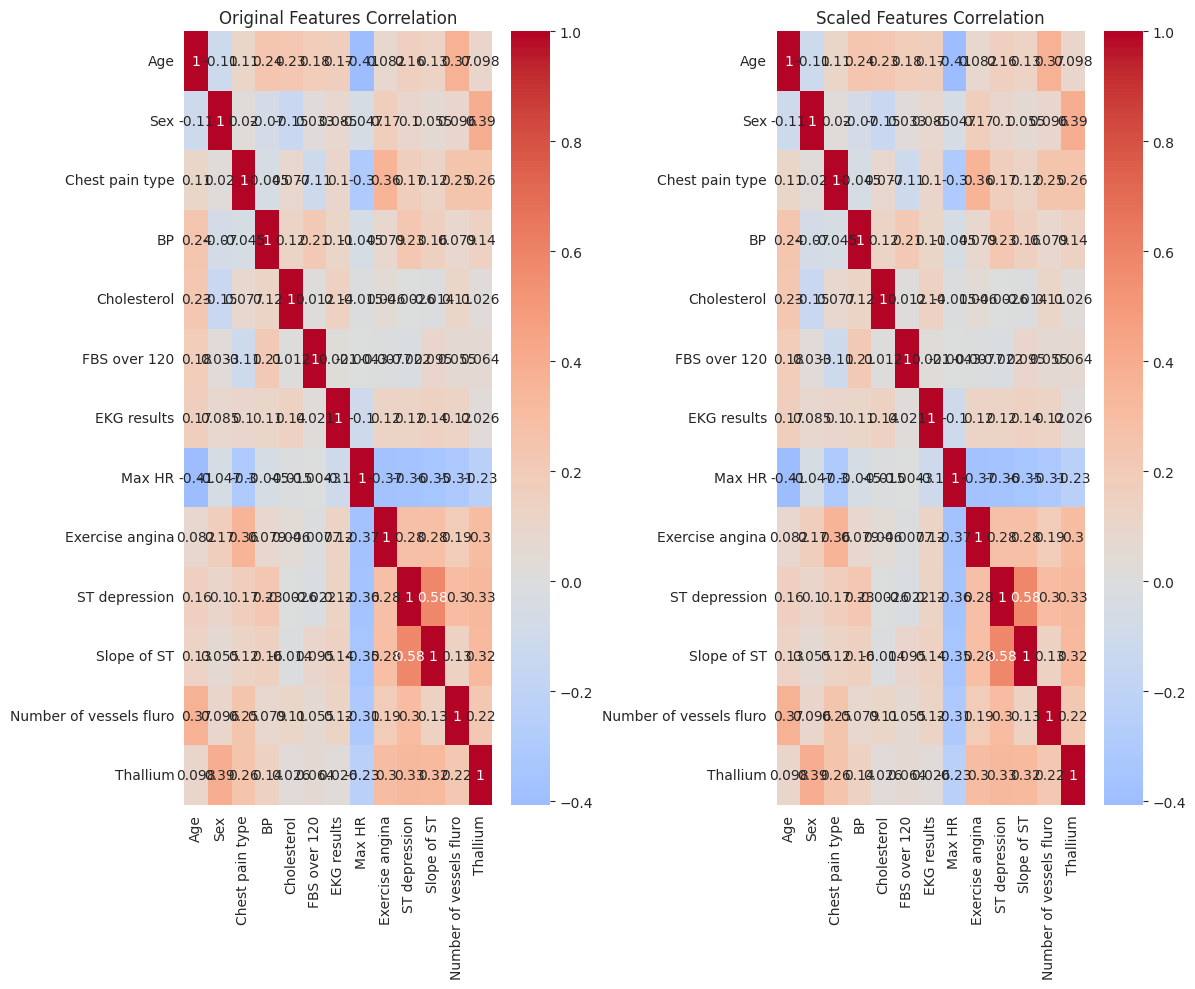

In [ ]:
# correlation heatmap
plt.figure(figsize=(12, 10))

# Original correlation
plt.subplot(1, 2, 1)
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Original Features Correlation')

# Scaled correlation
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X_train.columns).corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Scaled Features Correlation')

plt.tight_layout()
plt.show()

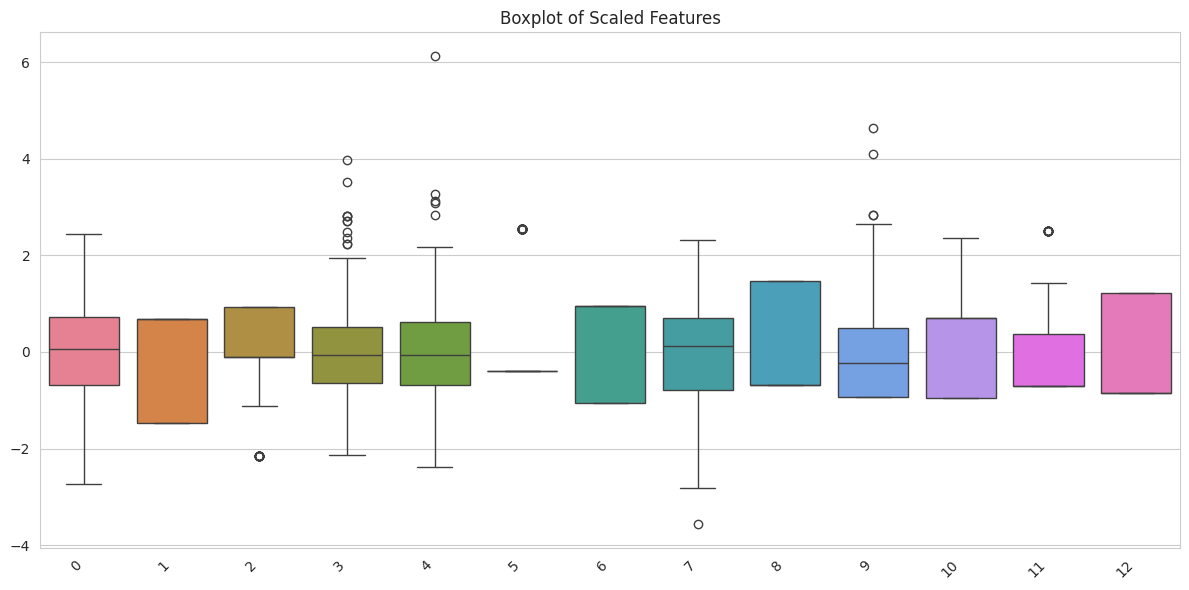

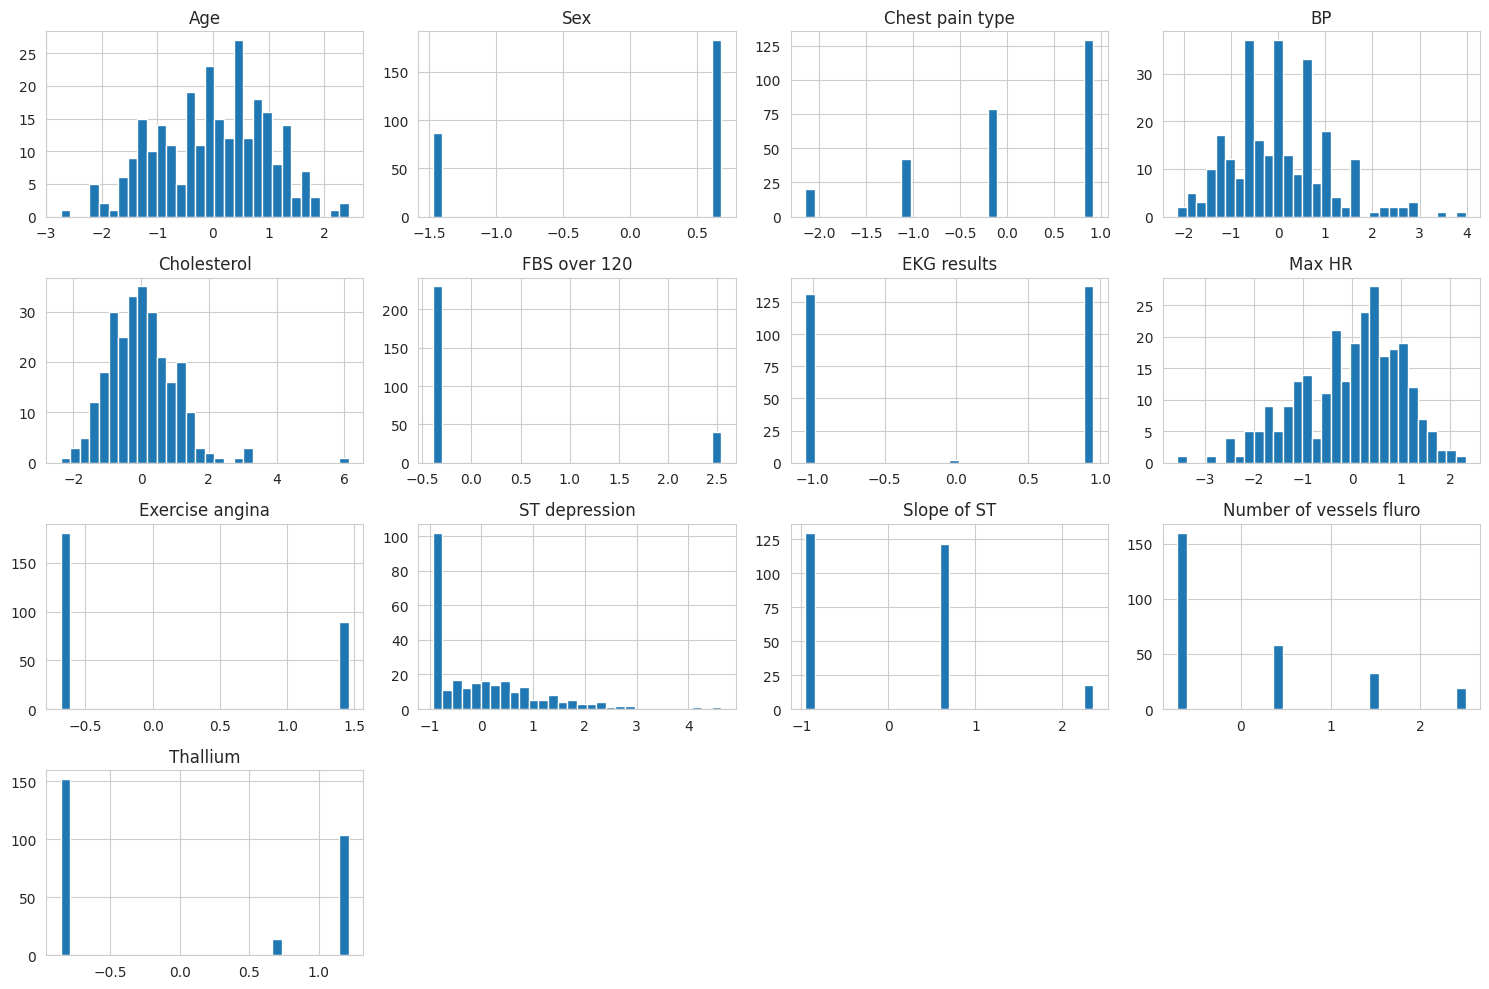

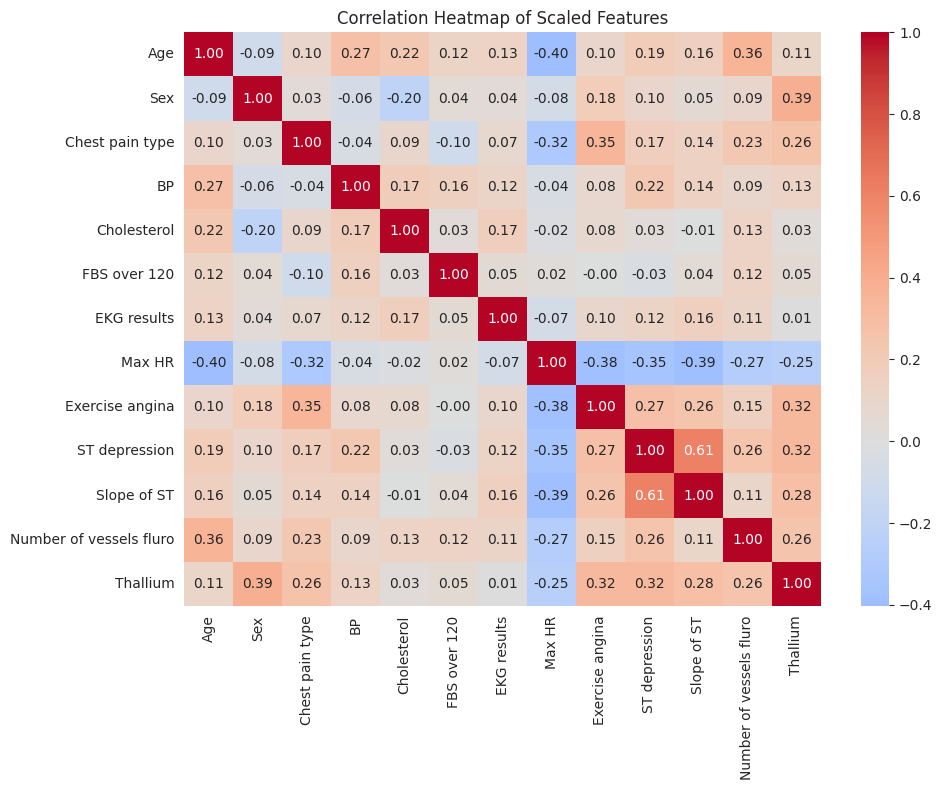

In [ ]:
# visualization for data cleaning & dataprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming X_train_scaled and X_test_scaled are already created

# Combine scaled training and test data for comprehensive visualization
X_scaled_combined = np.vstack((X_train_scaled, X_test_scaled))
feature_names = X.columns

# 1. Boxplot of Scaled Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled_combined)
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Histogram of Feature Distributions
plt.figure(figsize=(15, 10))
for i in range(X_scaled_combined.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.hist(X_scaled_combined[:, i], bins=30)
    plt.title(feature_names[i])
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled_combined, columns=feature_names).corr(),
            cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Scaled Features')
plt.tight_layout()
plt.show()

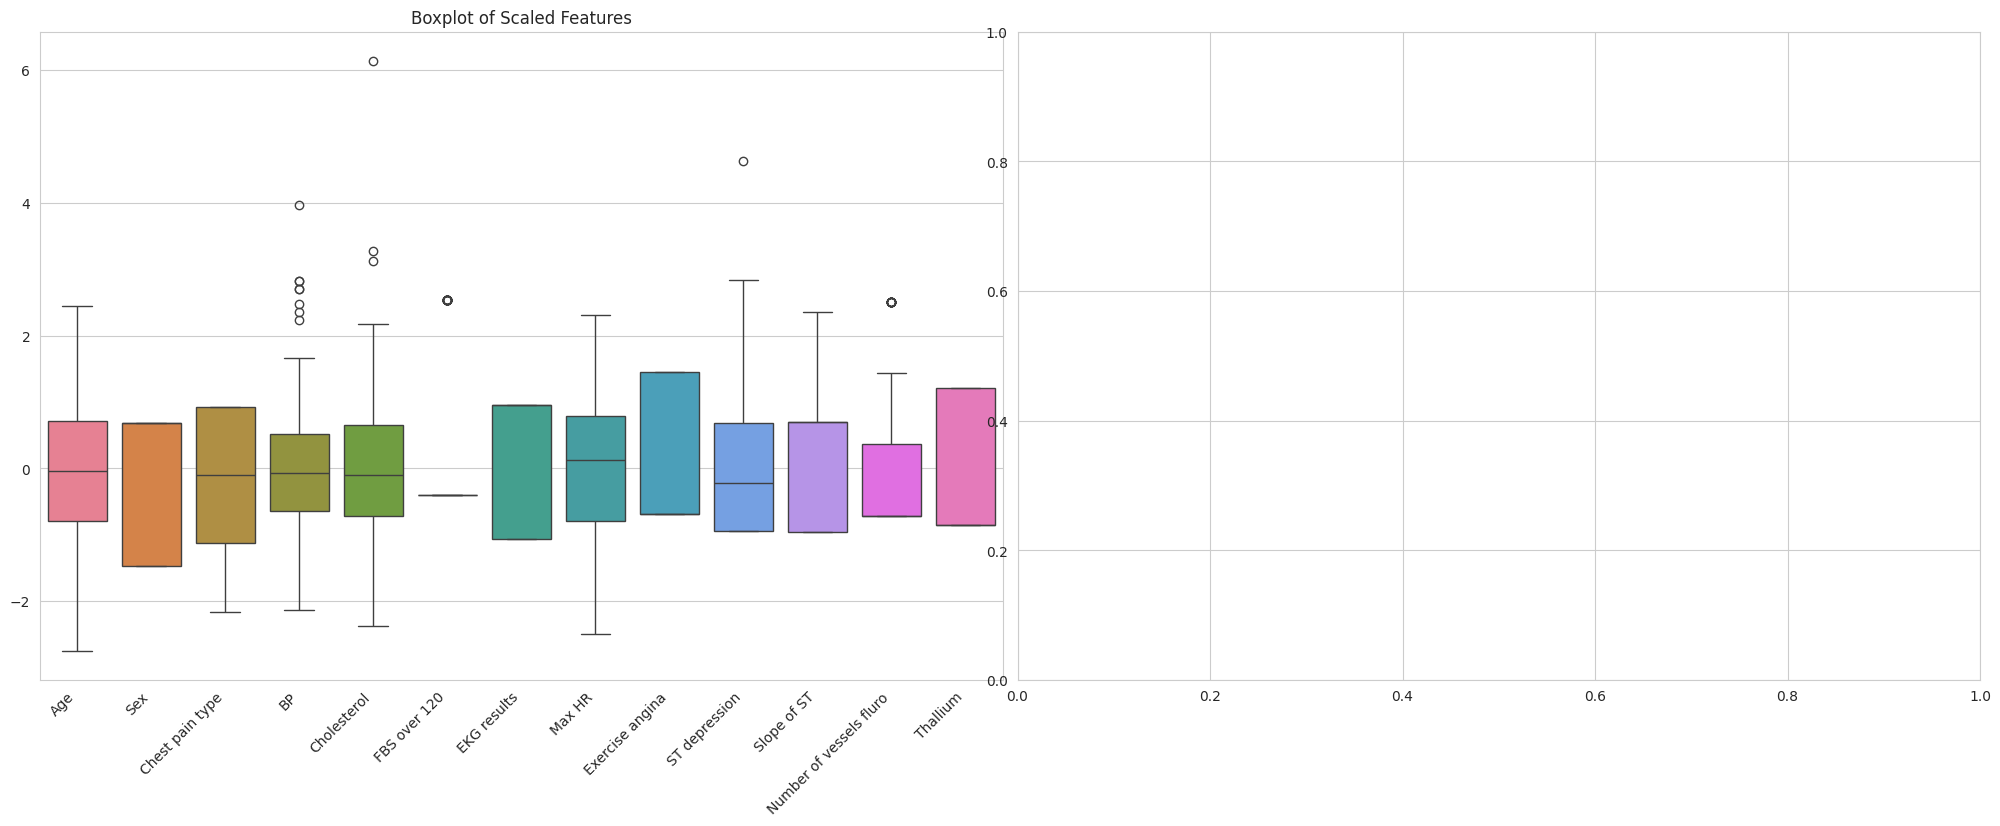

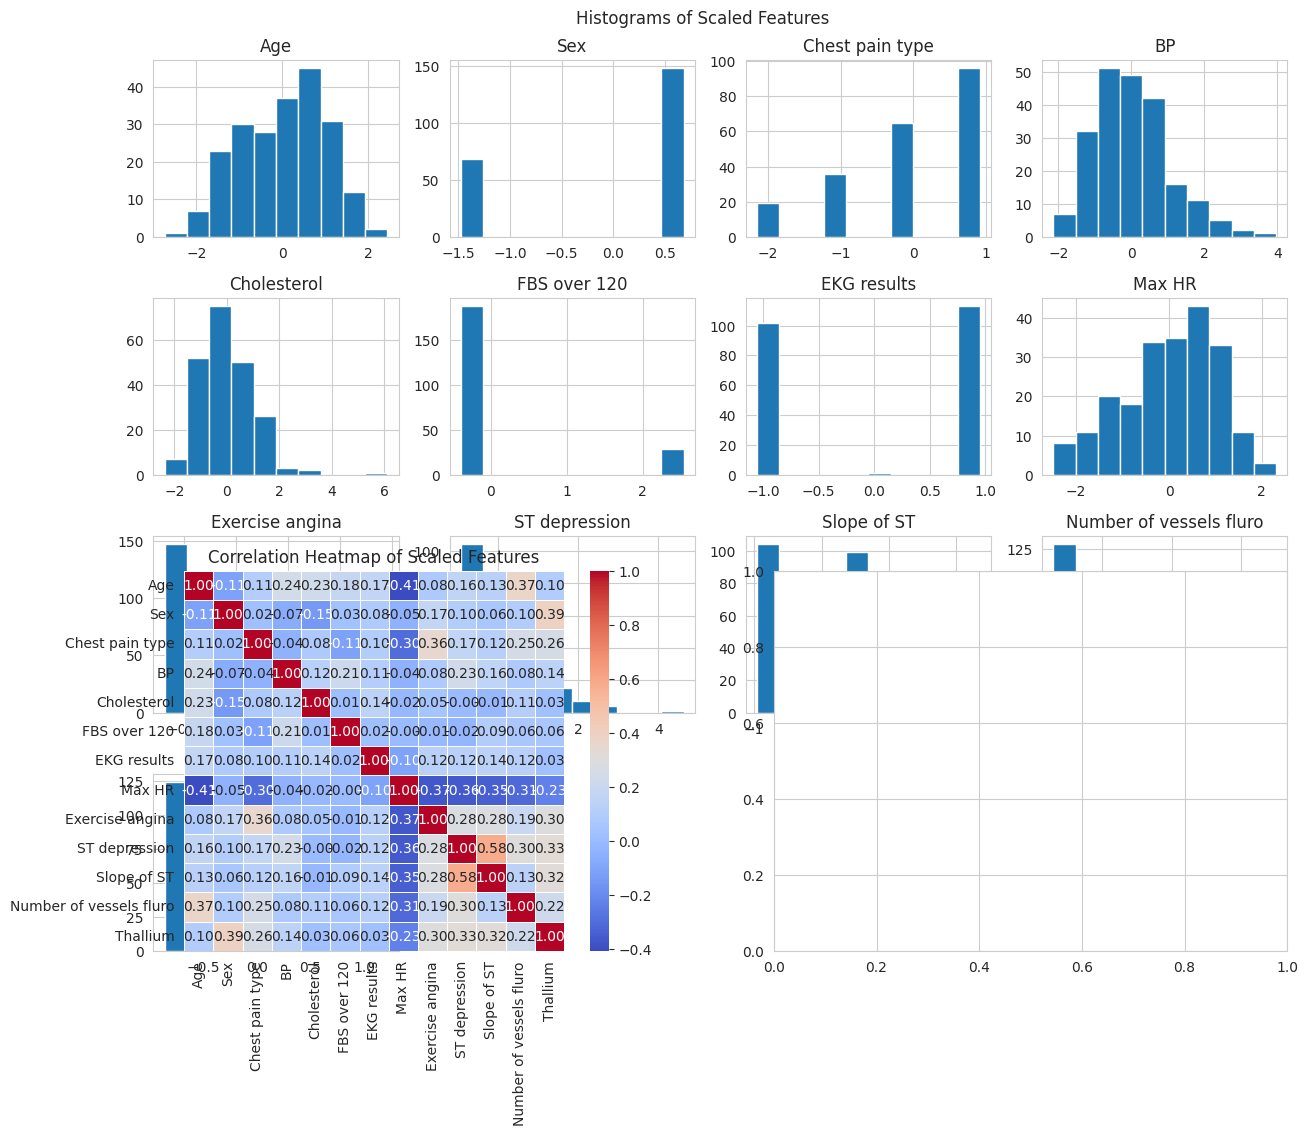

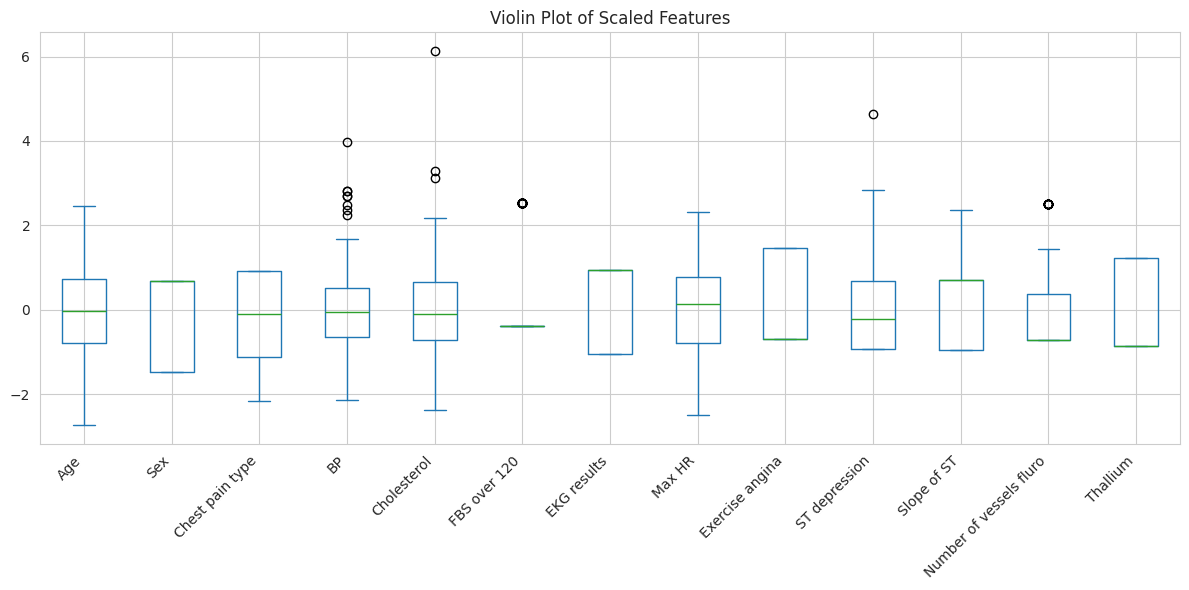

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you've already run the previous scaling code
# Create a DataFrame from the scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Set up the plotting
plt.figure(figsize=(20, 15))

# 1. Boxplot of Scaled Features
plt.subplot(2, 2, 1)
sns.boxplot(data=X_train_scaled_df)
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 2. Histogram of Scaled Features
plt.subplot(2, 2, 2)
X_train_scaled_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Scaled Features')
plt.tight_layout()

# 3. Correlation Heatmap
plt.subplot(2, 2, 3)
correlation_matrix = X_train_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Scaled Features')

# 4. Violin Plot
plt.subplot(2, 2, 4)
X_train_scaled_df.plot(kind='box', figsize=(12, 6))
plt.title('Violin Plot of Scaled Features')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**model selection & baseline**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54

ROC AUC: 0.898611111111111


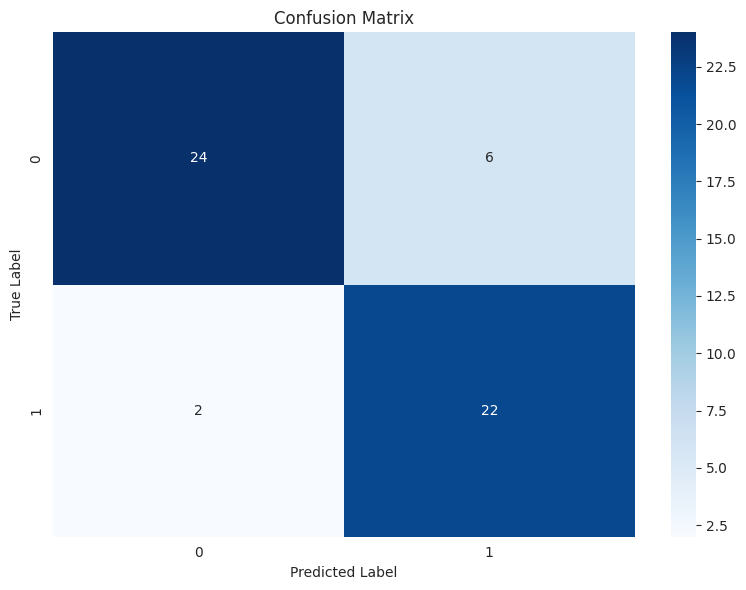

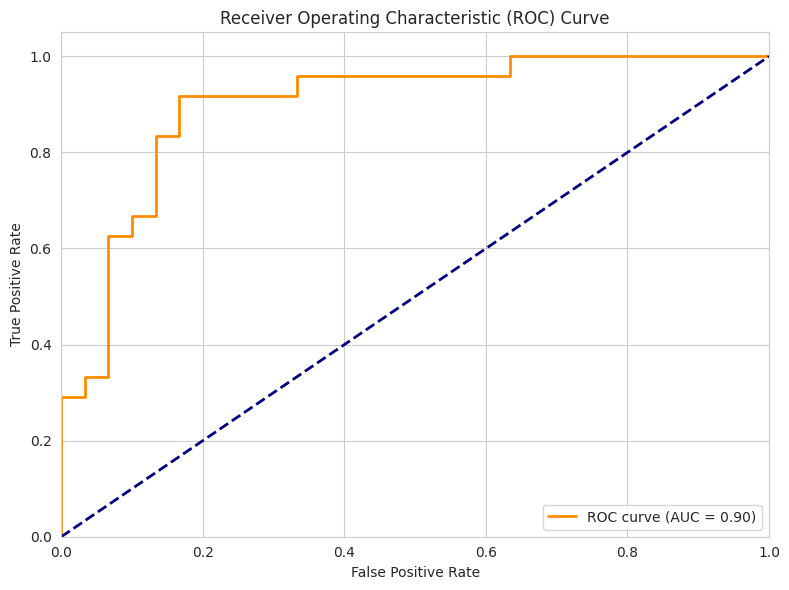

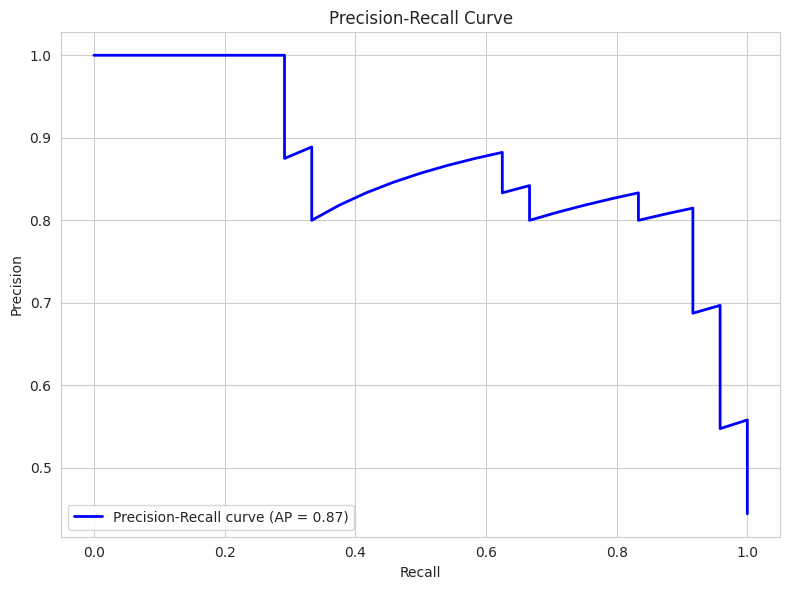

In [ ]:
# visualization for model selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8,6))
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])
average_precision = average_precision_score(y_test, clf.predict_proba(X_test_scaled)[:,1])

plt.plot(recall, precision, color='b', lw=2,
         label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

**model evaluation**

Text(0.5, 1.0, 'ROC')

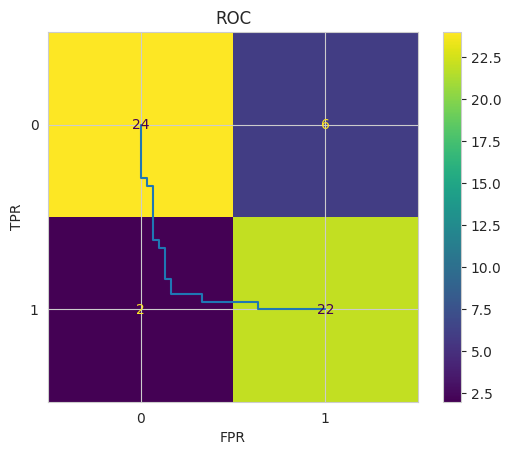

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC')

**hyperparameter tuning & cross validation**

RandomForestClassifier(random_state=42)
GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')


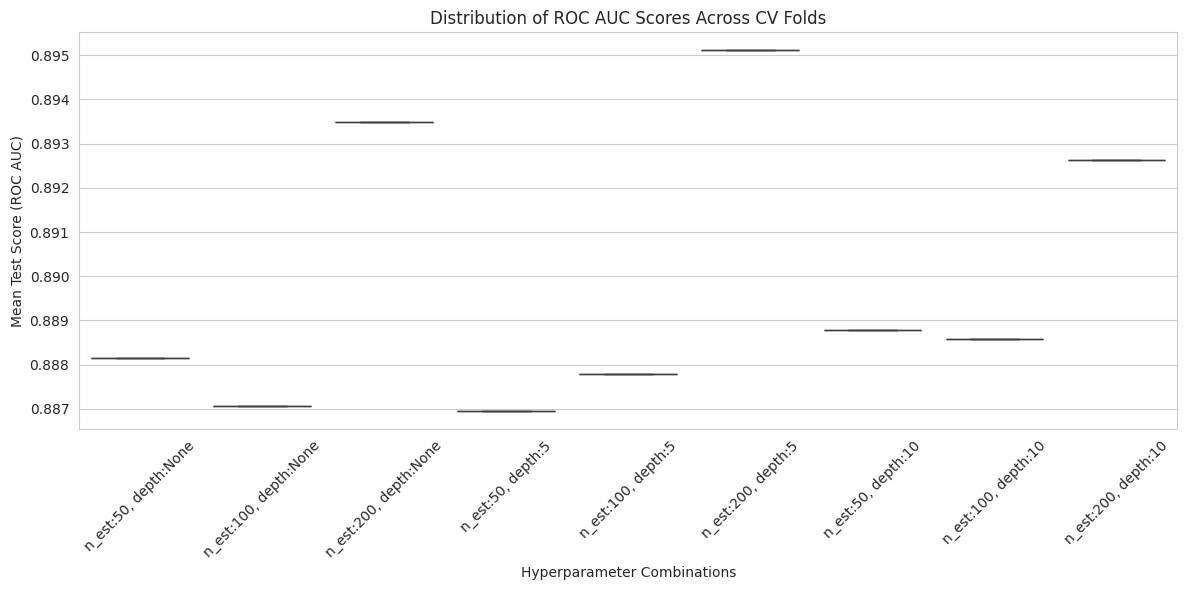

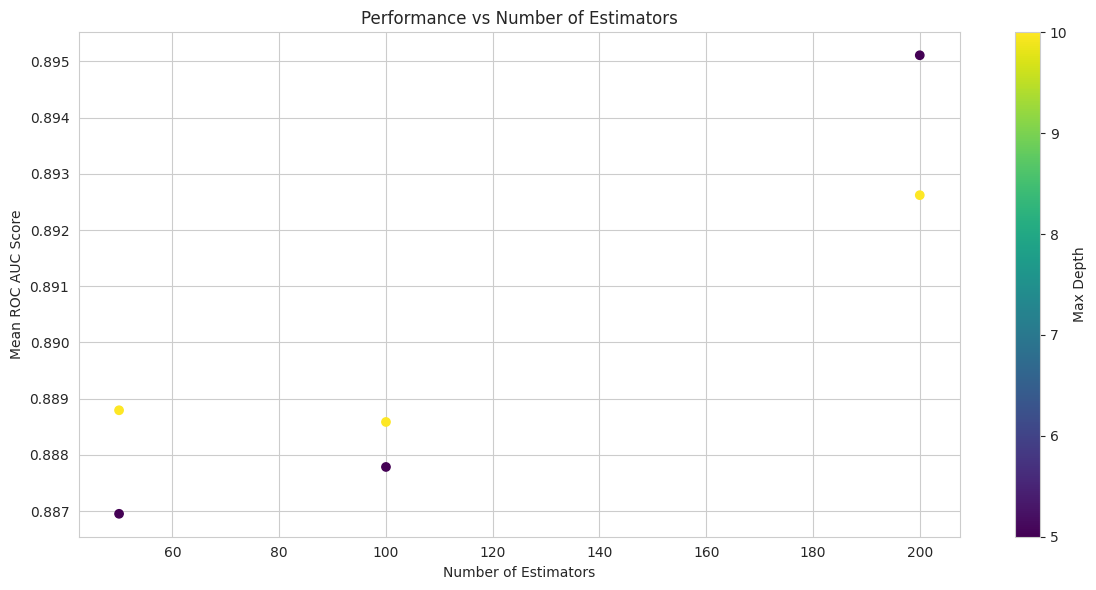

Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Score: 0.8951096491228071


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[50,100,200], 'max_depth':[None,5,10]}
rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, params, cv=5, scoring='roc_auc')
gs.fit(X_train_scaled, y_train)
gs.best_params_, gs.best_score_
print(rf)
print(gs)
# visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming you've already done the GridSearchCV
params = {'n_estimators':[50,100,200], 'max_depth':[None,5,10]}
rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, params, cv=5, scoring='roc_auc')
gs.fit(X_train_scaled, y_train)

# Create results_df from gs.cv_results_
results_df = pd.DataFrame(gs.cv_results_)

# 2. Boxplot of Test Scores
plt.figure(figsize=(12, 6))
results_df['params_str'] = results_df.apply(
    lambda row: f"n_est:{row['param_n_estimators']}, depth:{row['param_max_depth']}",
    axis=1
)
sns.boxplot(x='params_str', y='mean_test_score', data=results_df)
plt.title('Distribution of ROC AUC Scores Across CV Folds')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Test Score (ROC AUC)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Detailed Performance Comparison
plt.figure(figsize=(12, 6))
results_grouped = results_df.groupby(['param_n_estimators', 'param_max_depth'])['mean_test_score'].mean().reset_index()
plt.scatter(
    results_grouped['param_n_estimators'],
    results_grouped['mean_test_score'],
    c=results_grouped['param_max_depth'], # Removed .astype(str) here
    cmap='viridis'
)
plt.colorbar(label='Max Depth')
plt.title('Performance vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean ROC AUC Score')
plt.tight_layout()
plt.show()

# Print best parameters and score
print("Best Parameters:", gs.best_params_)
print("Best Score:", gs.best_score_)

**final model**

Chest pain type 0.14826389435444987
[0.06793287 0.03797319 0.14826389 0.05868125 0.06757769 0.00480101
 0.01215279 0.10912922 0.06484653 0.11092615 0.06226817 0.11696176
 0.13848547]
Thallium 0.13848546705162726
[0.06793287 0.03797319 0.14826389 0.05868125 0.06757769 0.00480101
 0.01215279 0.10912922 0.06484653 0.11092615 0.06226817 0.11696176
 0.13848547]
Number of vessels fluro 0.11696175514757434
[0.06793287 0.03797319 0.14826389 0.05868125 0.06757769 0.00480101
 0.01215279 0.10912922 0.06484653 0.11092615 0.06226817 0.11696176
 0.13848547]
ST depression 0.11092614861239355
[0.06793287 0.03797319 0.14826389 0.05868125 0.06757769 0.00480101
 0.01215279 0.10912922 0.06484653 0.11092615 0.06226817 0.11696176
 0.13848547]
Max HR 0.10912922007282572
[0.06793287 0.03797319 0.14826389 0.05868125 0.06757769 0.00480101
 0.01215279 0.10912922 0.06484653 0.11092615 0.06226817 0.11696176
 0.13848547]
Age 0.0679328715616472
[0.06793287 0.03797319 0.14826389 0.05868125 0.06757769 0.00480101
 0.01

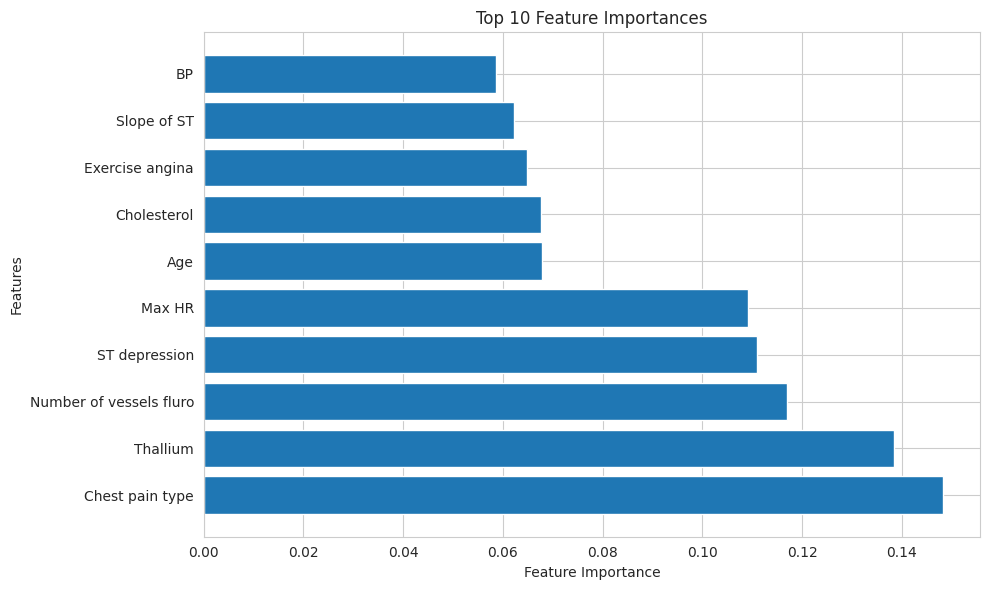

In [ ]:
import numpy as np
feat_imp = gs.best_estimator_.feature_importances_
for f,imp in sorted(zip(X.columns, feat_imp), key=lambda x: -x[1])[:10]:
    print(f, imp)
    print(feat_imp)
# visualization
import matplotlib.pyplot as plt
import numpy as np



# Sort feature importances in descending order
indices = np.argsort(feat_imp)[::-1]
sorted_features = [X.columns[i] for i in indices]
sorted_importances = feat_imp[indices]

# Take top 10 features
top_10_features = sorted_features[:10]
top_10_importances = sorted_importances[:10]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()